# Métodos de Ordenamiento

## Algoritmo de Ordenamiento Inserción (Insertion sort)
La idea central de este algoritmo, es que insertar un número ordenado desde la génesis de un arreglo, será siempre menos costoso que insertar y luego ordenar. Bajo esta premisa, el método de inserción comienza a recorrer el arreglo, tomando en cada iteración el $i-esimo$ elemento, como el elemento nuevo a insertar, dejandolo emplazado en el lugar "relativo" (puede cambiar su posición final, pero no su posición respecto a los elementos ya insertados) donde le corresponde. El problema de este algoritmo es que se comporta muy mal en arreglos de memoria estática, ya que en el peor de los casos, una inserción del $i-esimo$ elemento al inicio del arreglo, podría requerir $i-1$ desplazamientos. La necesidad de estos desplazamientos se ve anulada si implementamos este algoritmo de ordenamiento sobre una lista enlazada.

In [3]:
def insertion(arr):
    n=len(arr)
    for i in range(1,n):
        ne=arr[i]
        loc=i-1
        while loc>=0 and arr[loc]>ne:
            arr[loc+1]=arr[loc]
            loc=loc-1
        arr[loc+1]=ne
        print("elemento "+str(ne)+" posicionado en "+str(loc+1))
        print(arr)               

En el algoritmo presentado, el ciclo for itera sobre cada elemento a posicionar, mientras que el ciclo while realiza los desplazamientos necesarios para dejarlos en su posición relativa. A continuación veremos como funciona esto con un ejemplo:

In [5]:
arreglo=[15,5,8,9,3,2,7,18,12]
insertion(arreglo)
print ("Resultado final")
print (arreglo)

elemento 5 posicionado en 0
[5, 15, 8, 9, 3, 2, 7, 18, 12]
elemento 8 posicionado en 1
[5, 8, 15, 9, 3, 2, 7, 18, 12]
elemento 9 posicionado en 2
[5, 8, 9, 15, 3, 2, 7, 18, 12]
elemento 3 posicionado en 0
[3, 5, 8, 9, 15, 2, 7, 18, 12]
elemento 2 posicionado en 0
[2, 3, 5, 8, 9, 15, 7, 18, 12]
elemento 7 posicionado en 3
[2, 3, 5, 7, 8, 9, 15, 18, 12]
elemento 18 posicionado en 7
[2, 3, 5, 7, 8, 9, 15, 18, 12]
elemento 12 posicionado en 6
[2, 3, 5, 7, 8, 9, 12, 15, 18]
Resultado final
[2, 3, 5, 7, 8, 9, 12, 15, 18]


### Peor Caso
De la misma manera que sucedía con el algoritmo de burbuja, el algoritmo de inserción es sensitivo a las condiciones de entrada. Esto provoca que una muy mala entrada, que en este caso es un arreglo ordenado de manera inversa, provoque que este tenga que realizar todo el trabajo posible en términos de comparaciones e intercambios.
Es facil entonces ver, que en la iteración 1, se realizarán 0 intercambios, en la 2 se realizará 1 intercambio; en general para la iteración $i$ se realizarán $i-1$ intercambios.
La función $T(n)$, que mide el tiempo necesario para realizar los intercambios, en este caso esta definida por:
$$T(n)=\sum_{i=1}^{n-1}i$$
$$T(n)=\frac{(n-1)n}{2}$$
$$T(n)=\frac{n^2}{2}-\frac{n}{2}$$
$$T(n)\sim\frac{n^2}{2}=O(n^2)$$

### Caso Promedio
El peor caso nos ofrece una cota superior a la hora de establecer la cantidad de comparaciones que tendremos en promedio en cada iteración. Si bien, esta cota nos ofrece un rango para cualquier iteración $i$ de $[1...i-1]$, esto no es suficiente para establecer el número exacto de comparaciones, por ello es necesario determinar una función genérica $C(i)$ a partir de los datos que conocemos, que nos entregue con cierta probabilidad la cantidad de comparaciones por iteración. Para ello asumiremos que cada número de comparaciones tiene la misma probabilidad de ocurrir, quedando nuestra función $C(i)$ genérica como:
$$C(i)=\frac{1}{i+1}\left(i+\sum_{p=1}^{i}p\right)$$
Entre los paréntesis tenemos el costo total de realizar todas las comparaciones para cada iteración $i$, ponderados por una probabilidad $\frac{1}{i+1}$ de ocurrencia. El costo esta determinado por la sumatoria de $[1...i]$, a la cual se le suma $i$ (fuera de la sumatoria), ya que la última comparación que determina si el elemento esta en la posición $i-1$ o $i$ se realiza dos veces.
De esta forma, la función $T(n)$ que determina el costo total de realizar las comparaciones, esta definida por:
$$T(n)=\sum_{i=1}^{n-1}C(i)$$
Con la función $C(i)$ indeterminada, debemos definir esta función:
$$C(i)=\frac{1}{i+1}\left(i+\sum_{p=1}^{i}p\right)$$
$$C(i)=\frac{1}{i+1}\left(i+\frac{i(i+1)}{2}\right)$$
$$C(i)=\frac{2i+i(i+1)}{2(i+1)}$$
$$C(i)=\frac{2i}{2(i+1)}+\frac{i(i+1)}{2(i+1)}$$
$$C(i)=\frac{i}{i+1}+\frac{i}{2}$$
$$C(i)=\frac{i+1-1}{i+1}+\frac{i}{2}$$
$$C(i)=\frac{i+1}{i+1}-\frac{1}{i+1}+\frac{i}{2}$$
$$C(i)=1-\frac{1}{i+1}+\frac{i}{2}$$
Ahora reemplazamos en $T(n)$:
$$T(n)=\sum_{i=1}^{n-1}C(i)$$
$$T(n)=\sum_{i=1}^{n-1}1-\frac{1}{i+1}+\frac{i}{2}$$
$$T(n)=\sum_{i=1}^{n-1}1-\sum_{i=1}^{n-1}\frac{1}{i+1}+\sum_{i=1}^{n-1}\frac{i}{2}$$
$$T(n)=n-1-\left(\left(\sum_{i=1}^{n}\frac{1}{i}\right)-1\right)+\frac{1}{2}\sum_{i=1}^{n-1}i$$
$$T(n)\approx n-1-\ln (n)+1+\frac{(n-1)n}{4}$$
$$T(n)\approx n-\ln (n)+\frac{(n^2)}{4}-\frac{n}{4}$$
$$T(n)\approx \frac{n^2}{4}+\frac{3n}{4}-\ln (n)$$
$$T(n)\sim \frac{n^2}{4} = O(n^2)$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import time as tm
import scipy as sp

def insertion(arr):
    n=len(arr)
    for i in range(1,n):
        ne=arr[i]
        loc=i-1
        while loc>=0 and arr[loc]>ne:
            arr[loc+1]=arr[loc]
            loc=loc-1
        arr[loc+1]=ne
                

Definimos el arreglo donde se guardarán los números a ordenar, un arreglo con los tamaños de los arreglos a ordenar y un arreglo para guardar los tiempos de ejecución.


In [8]:
arreglo=[]
sizes=[64,128,256,512,1024,2048,4096,8192]
tiempos=[]

En el siguiente ciclo se generarán los arreglos con números aleatorios (lineas 2 y 3), se ordenarán con selección tomando sus tiempos (lineas 5 al 8) y luego se descartarán para pasar al siguiente tamaño en el arreglo sizes (lineas 10 y 11). <font color="red">OJO: dependiendo del tamaños de los arreglos el siguiente bloque podría tomar un tiempo considerable en terminar. Como referencia, con burbuja un arreglo de 65536 elementos demora aproximadamente 10 minutos en un pc de escritorio.</font>

In [9]:
for curr_size in sizes:
    for i in range(0,curr_size):
        arreglo.append(rnd.randint(1,200000))
    
    tiempo_inicial=tm.time()
    insertion(arreglo)
    tiempo_final=tm.time()
    tiempos.append(tiempo_final-tiempo_inicial)
    
    del arreglo
    arreglo=[]
    
print (sizes)
print (tiempos)

[64, 128, 256, 512, 1024, 2048, 4096, 8192]
[0.0002548694610595703, 0.0009272098541259766, 0.003309965133666992, 0.022675037384033203, 0.06489992141723633, 0.263505220413208, 1.0642869472503662, 4.296254873275757]


Finalmente gráficamos los tiempos a través de la librería matplotlib. Los puntos corresponden a las coordenadas sizes x tiempos y la linea es la aproximación a través de una función cuadrática. Podemos ver que obtenemos el comportamiento esperado para el ordenamiento tipo selección.


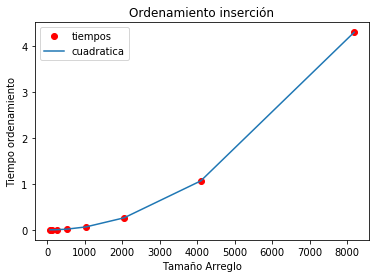

In [10]:
aproximacion=sp.polyfit(sizes,tiempos,2)

plt.plot(sizes, tiempos, "or", label='tiempos')
plt.plot(sizes, sp.polyval(aproximacion,sizes), label='cuadratica')
plt.xlabel('Tamaño Arreglo')
plt.ylabel('Tiempo ordenamiento')

plt.title('Ordenamiento inserción')

plt.legend(loc='best')

plt.show()